## Traffic Sign Detection Using CNN


In [28]:
import numpy as np
import pandas as pd
import os

In [29]:
os.chdir('/kaggle/input/gtsrb-german-traffic-sign/Train')

#### Showing the Images

In [30]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

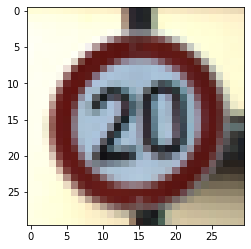

In [31]:
x="/kaggle/input/gtsrb-german-traffic-sign/Train/0/00000_00004_00029.png"
img=Image.open(x)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

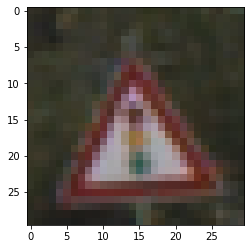

In [32]:
x=r'/kaggle/input/gtsrb-german-traffic-sign/Test/00299.png'
img=Image.open(x)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

#### Making a list of the classes

In [33]:
classes = ['Speed limit (20km/h)',
            'Speed limit (30km/h)', 
            'Speed limit (50km/h)', 
            'Speed limit (60km/h)', 
            'Speed limit (70km/h)', 
            'Speed limit (80km/h)', 
            'End of speed limit (80km/h)', 
            'Speed limit (100km/h)', 
            'Speed limit (120km/h)', 
            'No passing', 
            'No passing veh over 3.5 tons', 
            'Right-of-way at intersection', 
            'Priority road', 
            'Yield', 
            'Stop', 
            'No vehicles', 
            'Veh > 3.5 tons prohibited', 
            'No entry', 
            'General caution', 
            'Dangerous curve left', 
            'Dangerous curve right', 
            'Double curve', 
            'Bumpy road', 
            'Slippery road', 
            'Road narrows on the right', 
            'Road work', 
            'Traffic signals', 
            'Pedestrians', 
            'Children crossing', 
            'Bicycles crossing',
            'Beware of ice/snow',
            'Wild animals crossing', 
            'End speed + passing limits', 
            'Turn right ahead', 
            'Turn left ahead', 
            'Ahead only', 
            'Go straight or right', 
            'Go straight or left', 
            'Keep right', 
            'Keep left', 
            'Roundabout mandatory', 
            'End of no passing', 
            'End no passing veh > 3.5 tons' ]

#### Preprocess the Images 

In [34]:
from keras.preprocessing import image

#setting the path
train_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"

#creating image generation object
train_datagen = image.ImageDataGenerator(rescale=1./255)

#training the dataset
train = train_datagen.flow_from_directory(train_path, 
                                            target_size = (26,26),
                                            batch_size = 32, 
                                            class_mode = 'categorical')

Found 39209 images belonging to 43 classes.


#### Storing the Labels & the Data


In [35]:
data = []
labels = []
classes = 43
for i in range(classes):
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("error loading image.")
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)



#### Splitting the traing and Testing data


In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,
                                                    labels,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [37]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape )

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


#### Convert The Lables to neumwrical from categorical

In [38]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train, 43)
y_test=to_categorical(y_test, 43)

### Building the model

In [39]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

#32 filters
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#64 filters
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))#as we have 43 classes

#### Summary of the model

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)         

### Compiling the model

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fitting the model

In [43]:
history=model.fit(x_train,y_train,batch_size=32,epochs=25,validation_data=(x_test, y_test))

Epoch 1/25
981/981 [==============================] - 6s 5ms/step - loss: 2.0112 - accuracy: 0.4823 - val_loss: 0.6023 - val_accuracy: 0.8507
Epoch 2/25
981/981 [==============================] - 5s 5ms/step - loss: 0.8419 - accuracy: 0.7527 - val_loss: 0.3614 - val_accuracy: 0.9153
Epoch 3/25
981/981 [==============================] - 5s 5ms/step - loss: 0.6264 - accuracy: 0.8121 - val_loss: 0.2698 - val_accuracy: 0.9281
Epoch 4/25
981/981 [==============================] - 4s 5ms/step - loss: 0.5059 - accuracy: 0.8447 - val_loss: 0.1708 - val_accuracy: 0.9491
Epoch 5/25
981/981 [==============================] - 5s 5ms/step - loss: 0.4373 - accuracy: 0.8670 - val_loss: 0.1385 - val_accuracy: 0.9602
Epoch 6/25
981/981 [==============================] - 5s 5ms/step - loss: 0.3771 - accuracy: 0.8867 - val_loss: 0.1344 - val_accuracy: 0.9689
Epoch 7/25
981/981 [==============================] - 5s 5ms/step - loss: 0.3586 - accuracy: 0.8947 - val_loss: 0.1309 - val_accuracy: 0.9648
Epoch 

#### Checking the model Accuracy

In [44]:
score = model.evaluate(x_test,y_test,verbose = 0)

print('test accuracy: ', score[1])

test accuracy:  0.9795970320701599


In [45]:
from keras.models import load_model 
model.save("/kaggle/traffic.h5")

## To check How Our Model Working

In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def check(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    return image,Y_pred

In [48]:
classes = ['Speed limit (20km/h)',
            'Speed limit (30km/h)', 
            'Speed limit (50km/h)', 
            'Speed limit (60km/h)', 
            'Speed limit (70km/h)', 
            'Speed limit (80km/h)', 
            'End of speed limit (80km/h)', 
            'Speed limit (100km/h)', 
            'Speed limit (120km/h)', 
            'No passing', 
            'No passing veh over 3.5 tons', 
            'Right-of-way at intersection', 
            'Priority road', 
            'Yield', 
            'Stop', 
            'No vehicles', 
            'Veh > 3.5 tons prohibited', 
            'No entry', 
            'General caution', 
            'Dangerous curve left', 
            'Dangerous curve right', 
            'Double curve', 
            'Bumpy road', 
            'Slippery road', 
            'Road narrows on the right', 
            'Road work', 
            'Traffic signals', 
            'Pedestrians', 
            'Children crossing', 
            'Bicycles crossing',
            'Beware of ice/snow',
            'Wild animals crossing', 
            'End speed + passing limits', 
            'Turn right ahead', 
            'Turn left ahead', 
            'Ahead only', 
            'Go straight or right', 
            'Go straight or left', 
            'Keep right', 
            'Keep left', 
            'Roundabout mandatory', 
            'End of no passing', 
            'End no passing veh > 3.5 tons' ]

Predicted traffic sign is:  Keep right


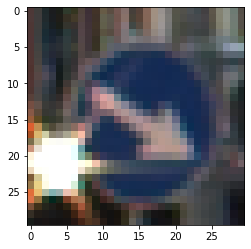

In [49]:
plot,prediction=check(r'/kaggle/input/gtsrb-german-traffic-sign/Test/00019.png')
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Road work


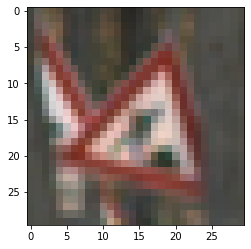

In [50]:
plot,prediction=check(r'/kaggle/input/gtsrb-german-traffic-sign/Test/00079.png')
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Speed limit (50km/h)


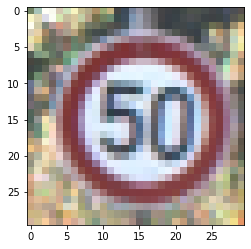

In [51]:
plot,prediction=check(r'/kaggle/input/gtsrb-german-traffic-sign/Test/00034.png')
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

# Thank You